In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/student_lifestyle_dataset.csv')

In [4]:
df.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB


In [6]:
df.describe()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,1000.500000,7.475800,1.990100,7.501250,2.704550,4.32830,3.115960
std,577.494589,1.423888,1.155855,1.460949,1.688514,2.51411,0.298674
min,1.000000,5.000000,0.000000,5.000000,0.000000,0.00000,2.240000
25%,500.750000,6.300000,1.000000,6.200000,1.200000,2.40000,2.900000
50%,1000.500000,7.400000,2.000000,7.500000,2.600000,4.10000,3.110000
75%,1500.250000,8.700000,3.000000,8.800000,4.100000,6.10000,3.330000
max,2000.000000,10.000000,4.000000,10.000000,6.000000,13.00000,4.000000


In [7]:
df.describe(include='O')

,Stress_Level
count,2000
unique,3
top,High
freq,1029


In [8]:
df.isna().sum()

Student_ID                         0
Study_Hours_Per_Day                0
Extracurricular_Hours_Per_Day      0
Sleep_Hours_Per_Day                0
Social_Hours_Per_Day               0
Physical_Activity_Hours_Per_Day    0
GPA                                0
Stress_Level                       0
dtype: int64

<Axes: >

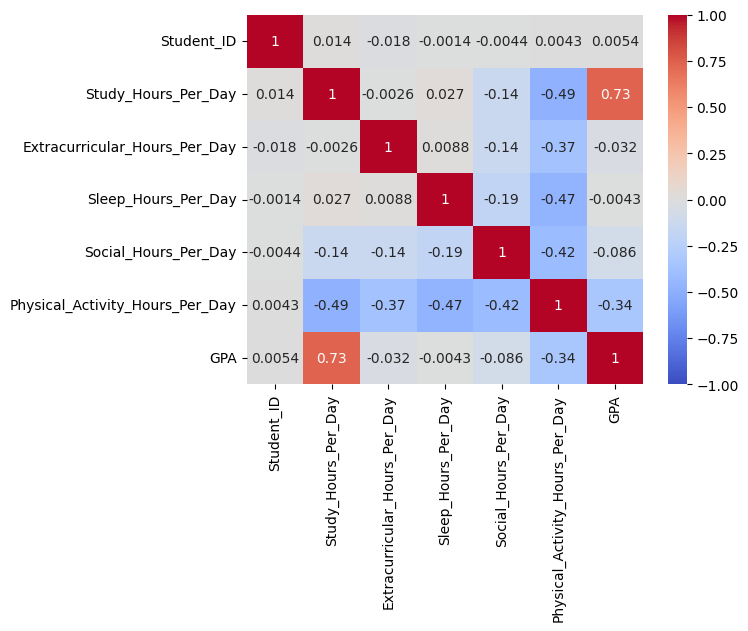

In [9]:
sns.heatmap(df.corr(numeric_only=True),
           vmin=-1,
           vmax=1,
           cmap='coolwarm',
           annot=True)

<Axes: xlabel='Study_Hours_Per_Day', ylabel='GPA'>

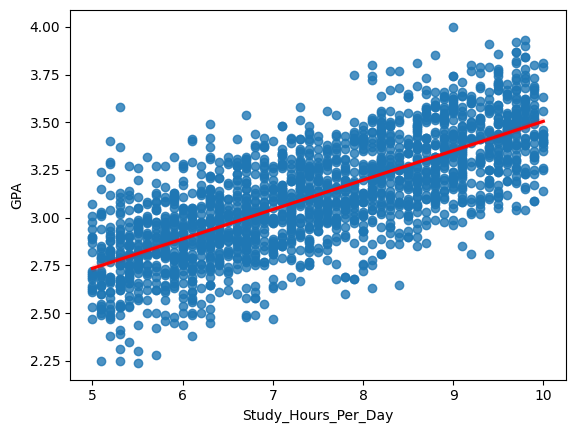

In [10]:
sns.regplot(data=df, x='Study_Hours_Per_Day', y='GPA', line_kws={'color': 'red'})

<Axes: xlabel='Physical_Activity_Hours_Per_Day', ylabel='GPA'>

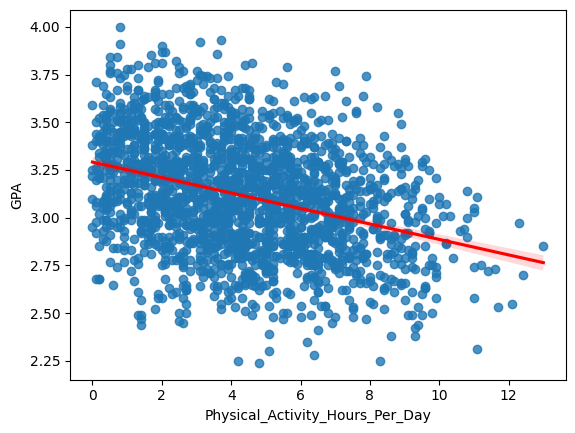

In [11]:
sns.regplot(data=df, x='Physical_Activity_Hours_Per_Day', y='GPA', line_kws={'color': 'red'})

<Axes: xlabel='Study_Hours_Per_Day', ylabel='Physical_Activity_Hours_Per_Day'>

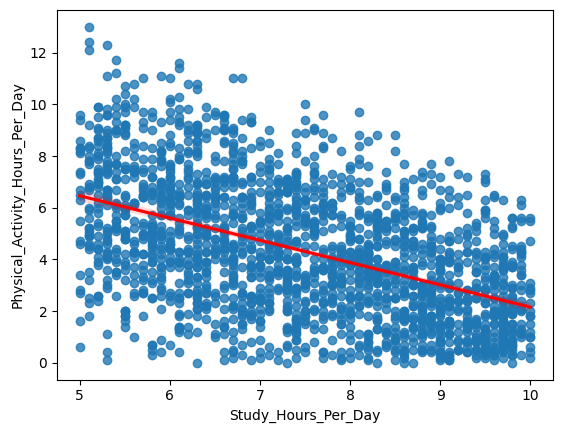

In [13]:
sns.regplot(data=df, x='Study_Hours_Per_Day', y='Physical_Activity_Hours_Per_Day', line_kws={'color': 'red'})

In [14]:
df.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


## Machine Learning

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

In [15]:
X = df.drop(columns=['Student_ID', 'GPA', 'Stress_Level'])
y = df[['GPA']]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [45]:
lr = LinearRegression()

In [46]:
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [47]:
lr.score(X_train, y_train)

0.5425157194016197

In [48]:
lr.score(X_test, y_test)

0.5344669475249626

In [49]:
y_pred = lr.predict(X_test)

In [50]:
root_mean_squared_error(y_test, y_pred)

0.2071738121653193

In [51]:
y_mean = y_test.mean()

In [53]:
baseline_preds = np.full_like(y_test, y_mean)

In [55]:
root_mean_squared_error(y_test, baseline_preds)

0.30364042945563097

In [56]:
X.head(1)

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day
0,6.9,3.8,8.7,2.8,1.8


In [81]:
me = pd.DataFrame({'Study_Hours_Per_Day': [8], 
                   'Extracurricular_Hours_Per_Day': [3], 
                   'Sleep_Hours_Per_Day': [8], 
                   'Social_Hours_Per_Day': [2], 
                   'Physical_Activity_Hours_Per_Day': [4]})

In [82]:
me

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day
0,8,3,8,2,4


In [83]:
lr.predict(me)

array([[3.15380647]])